In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# For reproducibility
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)


In [2]:
# Load the dataset
vocab_size = 10000  # Limit vocabulary to the top 10,000 words
max_length = 200    # Max review length for padding
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Embedding layer
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),        # LSTM layer
    Dense(1, activation='sigmoid')                       # Output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=1
)


Epoch 1/5
313/313 [==============================] - 171s 537ms/step - loss: 0.5342 - accuracy: 0.7372 - val_loss: 0.3522 - val_accuracy: 0.8538
Epoch 2/5
313/313 [==============================] - 165s 526ms/step - loss: 0.2740 - accuracy: 0.8890 - val_loss: 0.3700 - val_accuracy: 0.8574
Epoch 3/5
313/313 [==============================] - 163s 523ms/step - loss: 0.2021 - accuracy: 0.9219 - val_loss: 0.3465 - val_accuracy: 0.8558
Epoch 4/5
313/313 [==============================] - 163s 521ms/step - loss: 0.1562 - accuracy: 0.9442 - val_loss: 0.3681 - val_accuracy: 0.8590
Epoch 5/5
313/313 [==============================] - 164s 524ms/step - loss: 0.1240 - accuracy: 0.9556 - val_loss: 0.4175 - val_accuracy: 0.8656


In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


782/782 [==============================] - 40s 51ms/step - loss: 0.4547 - accuracy: 0.8548
Test Accuracy: 85.48%


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example review
review = "The movie was fantastic! I really enjoyed it."

# Tokenize and pad
tokenizer = imdb.get_word_index()
encoded_review = [tokenizer.get(word, 0) for word in review.lower().split()]
padded_review = pad_sequences([encoded_review], maxlen=max_length)

# Predict sentiment
prediction = model.predict(padded_review)
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Sentiment: {sentiment}")


1/1 [==============================] - 1s 550ms/step
Sentiment: Positive


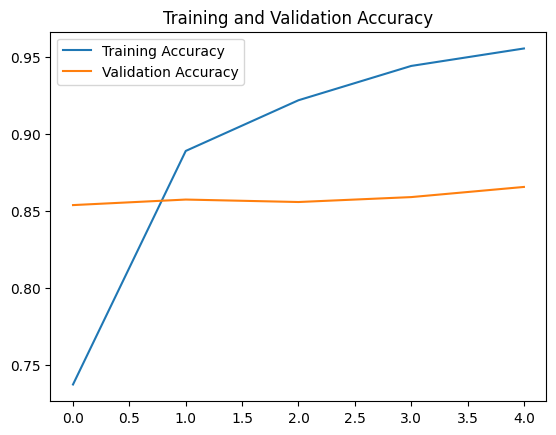

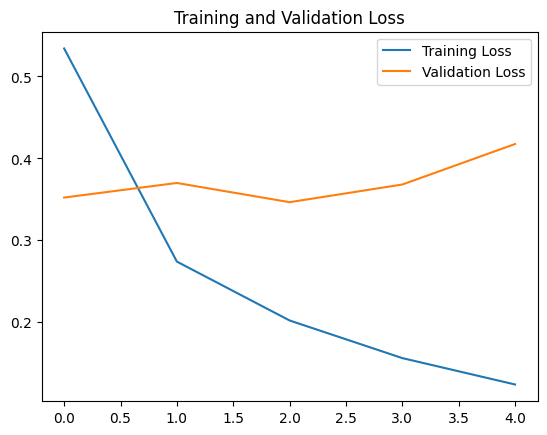

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
